In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [8]:
request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                  'User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                  'Accept-Encoding': 'gzip, deflate, br'}
url = "https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2"
page = requests.get(url,headers = request_header)
soup = BeautifulSoup(page.text)

p = soup.find_all("div",class_="Nx9bqj _4b5DiR")
prices = []
for i in p:
    prices.append(i.text)
    
data = soup.find_all("div",class_="KzDlHZ")
brands = []
for i in data:
    brands.append(i.text.split()[0])
    
models = []
for i in data:
    models.append(i.text.split("(")[0])
    
colors = []
for i in data:
    a = i.text
    if "(" in a:
        colors.append(i.text.split("(")[1].split(",")[0])
    else:
        colors.append(np.nan)
    
features = soup.find_all("li",class_="J+igdf")

RAM = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\s\w+\sRAM",a)
    if len(b)>0:
        RAM.append(b[0])
        
ROM = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\s\w+\sROM",a)
    if len(b)>0:
        ROM.append(b[0])
        
ss = []
for i in features:
    a = i.text
    b = re.findall("(\d+\.\d+)\sinch",a)
    if len(b)>0:
        ss.append(b[0])
        
battery = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\smAh",a)
    if len(b)>0:
        battery.append(b[0])

In [15]:
d2 = {"Brands":brands,
"Models":models,
"RAM":RAM,
"ROM":ROM,
"Display":ss,
"Battery":battery,
"Colors":colors,
"Prices":prices}

df2 = pd.DataFrame(d2)

In [12]:
brands

['Motorola',
 'POCO',
 'vivo',
 'Motorola',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'SAMSUNG',
 'vivo',
 'vivo',
 'realme',
 'realme',
 'vivo',
 'Motorola',
 'OnePlus',
 'SAMSUNG',
 'Motorola',
 'Apple',
 'REDMI',
 'Motorola',
 'SAMSUNG',
 'Apple',
 'Infinix',
 'REDMI']

In [13]:
len(RAM)

22

In [14]:
# import numpy as np
battery.insert(17,np.nan)
battery.insert(21,np.nan)


RAM.insert(17,np.nan)
RAM.insert(21,np.nan)


In [16]:
df2

,Brands,Models,RAM,ROM,Display,Battery,Colors,Prices
0,Motorola,Motorola g64 5G,8,128,6.5,6000,Mint Green,"₹14,999"
1,POCO,POCO C65,4,128,6.74,5000,Pastel Blue,"₹6,799"
2,vivo,vivo T3x 5G,8,128,6.72,6000,Crimson Bliss,"₹16,499"
3,Motorola,Motorola g04s,4,64,6.6,5000,Sunrise Orange,"₹6,999"
4,OnePlus,OnePlus Nord CE 3 Lite 5G,8,128,6.72,5000,Chromatic Gray,"₹16,789"
5,OnePlus,OnePlus Nord CE 3 Lite 5G,8,128,6.72,5000,Pastel Lime,"₹17,171"
6,OnePlus,OnePlus Nord CE 3 Lite 5G,8,256,6.72,5000,Chromatic Gray,"₹18,098"
7,SAMSUNG,SAMSUNG Galaxy S23 FE,8,128,6.4,4500,Mint,"₹39,999"
8,vivo,vivo T3x 5G,6,128,6.72,6000,Celestial Green,"₹14,999"
9,vivo,vivo T3x 5G,6,128,6.72,6000,Crimson Bliss,"₹14,999"


In [ ]:
urls = ["""https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=
search&marketplace=FLIPKART&as-show=on&as=off&page=30""",
"""https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=
search&marketplace=FLIPKART&as-show=on&as=off&page=4""",
"""https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=
search&marketplace=FLIPKART&as-show=on&as=off&page=5"""]

In [17]:
"https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+"10"

'https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=10'

In [25]:
prices = []
brands = []
models = []
colors = []
RAM = []
ROM = []
ss = []
battery = []

for i in range(3,6):
    print("https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i))
    urls = "https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i)
   
    page = requests.get(urls,headers = request_header)
    soup = BeautifulSoup(page.text)

    p = soup.find_all("div",class_="Nx9bqj _4b5DiR")
    
    for i in p:
        prices.append(i.text)

    data = soup.find_all("div",class_="KzDlHZ")
    
    for i in data:
        brands.append(i.text.split()[0])

    
    for i in data:
        models.append(i.text.split("(")[0])

    
    for i in data:
        a = i.text
        if "(" in a:
            colors.append(i.text.split("(")[1].split(",")[0])
        else:
            colors.append(np.nan)

    features = soup.find_all("li",class_="J+igdf")

   
    for i in features:
        a = i.text
        b = re.findall("(\d+)\s\w+\sRAM",a)
        if len(b)>0:
            RAM.append(b[0])

    
    for i in features:
        a = i.text
        b = re.findall("(\d+)\s\w+\sROM",a)
        if len(b)>0:
            ROM.append(b[0])

   
    for i in features:
        a = i.text
        b = re.findall("(\d+\.\d+)\sinch",a)
        if len(b)>0:
            ss.append(b[0])

   
    for i in features:
        a = i.text
        b = re.findall("(\d+)\smAh",a)
        if len(b)>0:
            battery.append(b[0])

https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5


In [35]:
d3 = {"Brands":brands,
"Models":models,
"RAM":RAM,
"ROM":ROM,
"Display":ss,
"Battery":battery,
"Colors":colors,
"Prices":prices}

df3 = pd.DataFrame(d3)

In [23]:
24*3

72

In [34]:
len(battery)

72

In [32]:
for i in range(len(brands)):
    if brands[i] == "Apple":
        RAM.insert(i,np.nan)
        battery.insert(i,np.nan)

In [36]:
df3

,Brands,Models,RAM,ROM,Display,Battery,Colors,Prices
0,Motorola,Motorola Edge 50 Pro 5G with 125W Charger,12,256,6.7,4500,Vanilla Cream,"₹35,999"
1,Motorola,Motorola Edge 50 Pro 5G with 68W Charger,8,256,6.7,4500,Luxe Lavender,"₹31,999"
2,SAMSUNG,SAMSUNG Galaxy S23 5G,8,256,6.1,3900,Green,"₹54,999"
3,Motorola,Motorola G34 5G,8,128,6.5,5000,Charcoal Black,"₹11,999"
4,POCO,POCO C65,4,128,6.74,5000,Pastel Green,"₹6,799"
...,...,...,...,...,...,...,...,...
67,realme,realme Narzo N63 4G,4,128,6.745,5000,Leather Blue,"₹8,688"
68,vivo,vivo T3 5G,8,256,6.67,5000,Crystal Flake,"₹21,999"
69,Samsung,Samsung Galaxy S21 FE 5G with Snapdragon 888,8,256,6.4,4500,Graphite,"₹27,940"
70,Infinix,Infinix Smart 8 Plus,4,128,6.6,6000,Timber Black,"₹7,799"


In [39]:
df3

,Brands,Models,RAM,ROM,Display,Battery,Colors,Prices
0,Motorola,Motorola Edge 50 Pro 5G with 125W Charger,12,256,6.7,4500,Vanilla Cream,"₹35,999"
1,Motorola,Motorola Edge 50 Pro 5G with 68W Charger,8,256,6.7,4500,Luxe Lavender,"₹31,999"
2,SAMSUNG,SAMSUNG Galaxy S23 5G,8,256,6.1,3900,Green,"₹54,999"
3,Motorola,Motorola G34 5G,8,128,6.5,5000,Charcoal Black,"₹11,999"
4,POCO,POCO C65,4,128,6.74,5000,Pastel Green,"₹6,799"
...,...,...,...,...,...,...,...,...
67,realme,realme Narzo N63 4G,4,128,6.745,5000,Leather Blue,"₹8,688"
68,vivo,vivo T3 5G,8,256,6.67,5000,Crystal Flake,"₹21,999"
69,Samsung,Samsung Galaxy S21 FE 5G with Snapdragon 888,8,256,6.4,4500,Graphite,"₹27,940"
70,Infinix,Infinix Smart 8 Plus,4,128,6.6,6000,Timber Black,"₹7,799"


In [42]:
final_df = pd.concat([df,df2,df3],axis = 0,ignore_index = True)

# Data Cleaning

In [43]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brands   120 non-null    object
 1   Models   120 non-null    object
 2   RAM      108 non-null    object
 3   ROM      120 non-null    object
 4   Display  120 non-null    object
 5   Battery  108 non-null    object
 6   Colors   111 non-null    object
 7   Prices   120 non-null    object
dtypes: object(8)
memory usage: 7.6+ KB


### missing value treatment

In [45]:
final_df['RAM'] = final_df['RAM'].fillna("0")
final_df['Battery'] = final_df['Battery'].fillna("0")

In [46]:
final_df['Colors'].mode()

0    Titanium Grey
Name: Colors, dtype: object

In [48]:
final_df['Colors'] = final_df['Colors'].fillna(final_df['Colors'].mode()[0])

In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   120 non-null    object 
 1   Models   120 non-null    object 
 2   RAM      120 non-null    int32  
 3   ROM      120 non-null    int32  
 4   Display  120 non-null    float64
 5   Battery  120 non-null    object 
 6   Colors   120 non-null    object 
 7   Prices   120 non-null    object 
dtypes: float64(1), int32(2), object(5)
memory usage: 6.7+ KB


## Type conversion

In [51]:
final_df['RAM'] = final_df['RAM'].astype("int")
final_df['ROM'] = final_df['ROM'].astype("int")
final_df['Display'] = final_df['Display'].astype("float")

In [53]:
final_df['Prices'] = final_df['Prices'].astype("int")

ValueError: invalid literal for int() with base 10: '₹55,999'

In [56]:
final_df['Prices'][0].replace("₹","").replace(",","")

'55999'

In [58]:
final_df['Prices'] = [i.replace("₹","").replace(",","") for i in final_df['Prices']]

In [59]:
final_df['Prices'] = final_df['Prices'].astype("int")

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   120 non-null    object 
 1   Models   120 non-null    object 
 2   RAM      120 non-null    int32  
 3   ROM      120 non-null    int32  
 4   Display  120 non-null    float64
 5   Battery  120 non-null    object 
 6   Colors   120 non-null    object 
 7   Prices   120 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 6.2+ KB


# Data Analysis and visualization

1. univariate
2. bivariate
3. multivariate

In [61]:
final_df['Brands'].nunique()

13

In [62]:
final_df['Brands'].unique()

array(['vivo', 'SAMSUNG', 'Motorola', 'Apple', 'REDMI', 'POCO', 'OnePlus',
       'realme', 'Infinix', 'I', 'LAVA', 'Nokia', 'Samsung'], dtype=object)

In [63]:
final_df['Brands'].value_counts()

Brands
Motorola    19
vivo        15
realme      15
Apple       12
REDMI       12
SAMSUNG     11
POCO        11
Infinix     11
I            6
OnePlus      4
Nokia        2
LAVA         1
Samsung      1
Name: count, dtype: int64

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

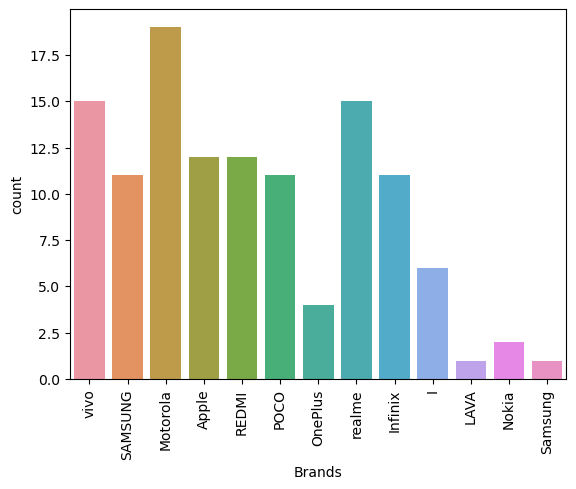

In [71]:

sns.countplot(x ='Brands', data = final_df)
plt.xticks(rotation = 90)
plt.show()

In [73]:
final_df['Prices'].describe()

count      120.000000
mean     21610.033333
std      18952.533683
min        879.000000
25%       7999.000000
50%      14999.000000
75%      27157.000000
max      73999.000000
Name: Prices, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_22520\327978766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Prices'])


<Axes: xlabel='Prices', ylabel='Density'>

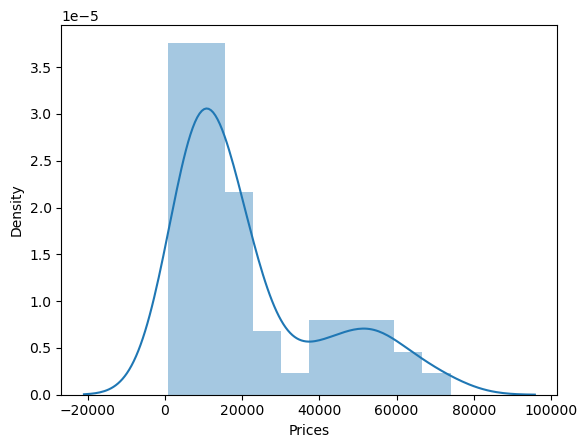

In [74]:
sns.distplot(final_df['Prices'])

<Axes: >

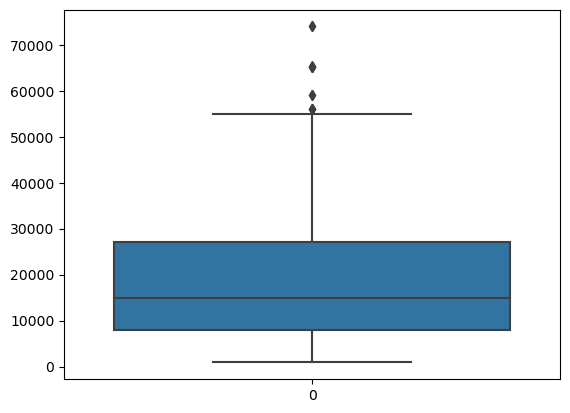

In [75]:
sns.boxplot(final_df['Prices'])

In [77]:
final_df.groupby("Brands")['Prices'].mean()

Brands
Apple       59728.166667
I            1252.333333
Infinix      7799.000000
LAVA          958.000000
Motorola    17104.263158
Nokia        1222.500000
OnePlus     17561.750000
POCO         7635.363636
REDMI       11522.583333
SAMSUNG     41817.181818
Samsung     27940.000000
realme      14857.200000
vivo        30099.000000
Name: Prices, dtype: float64

In [78]:
final_df.groupby("Brands")['Prices'].agg(['min','mean','max'])

,min,mean,max
Brands,,,
Apple,37999,59728.166667,73999
I,879,1252.333333,1999
Infinix,7299,7799.000000,8999
LAVA,958,958.000000,958
Motorola,6999,17104.263158,35999
Nokia,1199,1222.500000,1246
OnePlus,16789,17561.750000,18189
POCO,5799,7635.363636,9999
REDMI,7699,11522.583333,26896


In [84]:
final_df.select_dtypes(exclude="O")

,RAM,ROM,Display,Prices
0,12,512,6.780,55999
1,12,512,6.780,41999
2,8,128,6.100,49999
3,8,128,6.670,17999
4,0,128,6.100,65249
...,...,...,...,...
115,4,128,6.745,8688
116,8,256,6.670,21999
117,8,256,6.400,27940
118,4,128,6.600,7799


<Axes: >

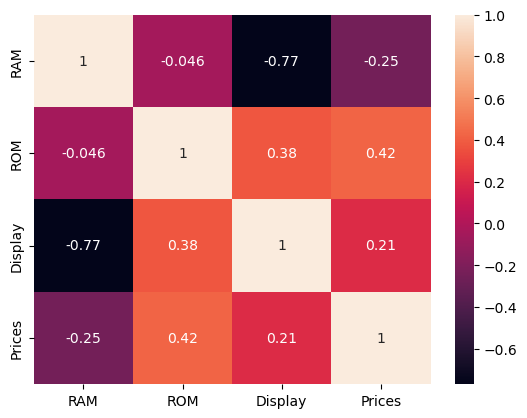

In [87]:
sns.heatmap(final_df.select_dtypes(exclude="O").corr(),annot=True)

In [88]:
final_df[final_df['Prices']<=15000]

,Brands,Models,RAM,ROM,Display,Battery,Colors,Prices
9,Motorola,Motorola g04s,0,64,6.600,0,Sea Green,6999
10,REDMI,REDMI 13C,4,128,6.740,5000,Stardust Black,7699
12,Motorola,Motorola g04s,12,64,6.600,5000,Satin Blue,6999
15,REDMI,REDMI 13C,4,128,6.740,5000,Starfrost White,7699
17,POCO,POCO M6 5G,4,128,6.740,5000,Orion Blue,9999
...,...,...,...,...,...,...,...,...
108,REDMI,REDMI 12 5G,8,256,6.790,5000,Pastel Blue,13999
109,POCO,POCO C61,4,64,6.710,5000,Ethereal Blue,6299
114,realme,realme Narzo N63 4G,4,128,6.740,5000,Twilight Purple,8683
115,realme,realme Narzo N63 4G,4,128,6.745,5000,Leather Blue,8688


In [90]:
final_df[(final_df['Prices']<=15000) & (final_df['Brands']=='REDMI')]

,Brands,Models,RAM,ROM,Display,Battery,Colors,Prices
10,REDMI,REDMI 13C,4,128,6.74,5000,Stardust Black,7699
15,REDMI,REDMI 13C,4,128,6.74,5000,Starfrost White,7699
18,REDMI,REDMI 13C,0,128,6.74,0,Starshine Green,7699
22,REDMI,REDMI 13C 5G,4,128,6.74,5000,Starlight Black,10499
42,REDMI,REDMI 12 5G,6,128,6.79,5000,Jade Black,12499
47,REDMI,REDMI 13C 5G,4,128,6.74,5000,Startrail Green,10499
54,REDMI,REDMI 13C,6,128,6.74,5000,Starfrost White,8499
65,REDMI,REDMI 13C,6,128,6.74,5000,Stardust Black,8499
105,REDMI,REDMI 13C,6,128,6.74,5000,Starshine Green,8499
108,REDMI,REDMI 12 5G,8,256,6.79,5000,Pastel Blue,13999


In [91]:
final_df[(final_df['Prices']<=15000) & (final_df['Brands']=='REDMI') & (final_df['RAM']==6)]

,Brands,Models,RAM,ROM,Display,Battery,Colors,Prices
42,REDMI,REDMI 12 5G,6,128,6.79,5000,Jade Black,12499
54,REDMI,REDMI 13C,6,128,6.74,5000,Starfrost White,8499
65,REDMI,REDMI 13C,6,128,6.74,5000,Stardust Black,8499
105,REDMI,REDMI 13C,6,128,6.74,5000,Starshine Green,8499
